Importing dataset in realtime

In [ ]:
import pandas as pd
import numpy as np
import gspread
from google.colab import files
from google.colab import auth
# Authenticate and connect to Google Sheets
auth.authenticate_user()

# Import necessary libraries for google-auth
from google.auth import default
creds, _ = default()

# Now authorize using gspread with the google-auth credentials
gc = gspread.authorize(creds)

# Open your Google Sheet by its URL or name
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1iWhqVBJuCjdopKfGzQ6ep6aVolE7nqwngc2HOOjsqpo').sheet1

# Get all values as a list of lists
data = sheet.get_all_values()

# Create a Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # Use the first row as column names

df = df.drop('Sampling Date', axis=1)

columns_to_convert = ['410nm', '435nm', '460nm', '485nm', '510nm', '535nm', '560nm', '585nm',
       '610nm', '645nm', '680nm', '705nm', '730nm', '760nm', '810nm', '860nm',
       '900nm', '940nm', 'Brix']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   410nm   1200 non-null   float64
 1   435nm   1200 non-null   float64
 2   460nm   1200 non-null   float64
 3   485nm   1200 non-null   float64
 4   510nm   1200 non-null   float64
 5   535nm   1200 non-null   float64
 6   560nm   1200 non-null   float64
 7   585nm   1200 non-null   float64
 8   610nm   1200 non-null   float64
 9   645nm   1200 non-null   float64
 10  680nm   1200 non-null   float64
 11  705nm   1200 non-null   float64
 12  730nm   1200 non-null   float64
 13  760nm   1200 non-null   float64
 14  810nm   1200 non-null   float64
 15  860nm   1200 non-null   float64
 16  900nm   1200 non-null   float64
 17  940nm   1200 non-null   float64
 18  Brix    1200 non-null   float64
dtypes: float64(19)
memory usage: 178.3 KB


,410nm,435nm,460nm,485nm,510nm,535nm,560nm,585nm,610nm,645nm,680nm,705nm,730nm,760nm,810nm,860nm,900nm,940nm,Brix
0,5.00,11.67,42.33,49.33,59.33,36.33,5.00,10.00,7.33,8.33,5.00,31.33,9.67,6.00,6.67,4.00,35.33,16.00,4.7
1,3.00,8.00,34.00,41.33,51.33,34.00,3.67,6.67,5.33,6.00,3.67,21.00,5.67,3.67,3.67,2.67,24.33,10.67,5.1
2,4.00,10.67,36.67,43.67,56.00,38.00,4.33,8.33,6.33,8.33,4.33,27.33,7.67,4.67,5.00,3.67,29.00,13.33,5.2
3,5.67,7.33,40.33,40.33,52.67,30.67,4.00,8.00,4.67,7.67,3.00,24.67,6.00,3.67,4.33,2.67,24.67,10.67,5.2
4,3.00,9.33,37.00,43.00,53.67,36.00,3.33,7.00,7.33,7.00,4.67,24.67,7.33,5.00,5.00,3.33,27.00,12.33,5.1


Sort dataframe

In [ ]:
df.sort_values(by=['Brix'], inplace=True, ascending=True)
df.to_csv('CherryTomatoDataset.csv', index = False)

Cleaning the data

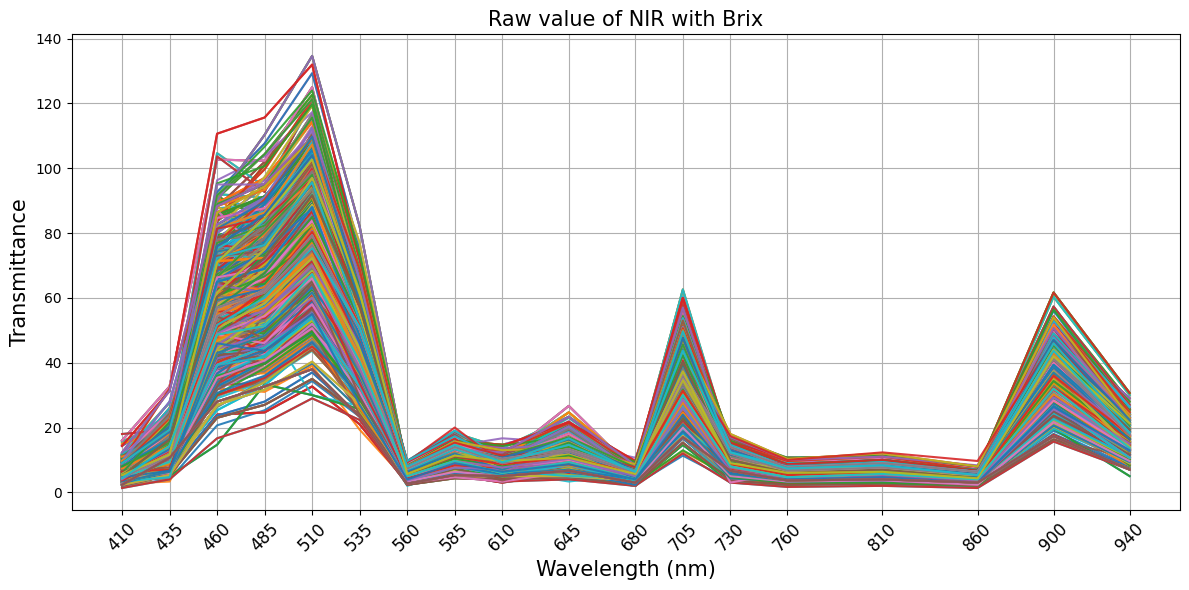

      410nm  435nm  460nm  485nm   510nm  535nm  560nm  585nm  610nm  645nm  \
1093  11.33  17.67  82.67  90.33  107.00  61.00   8.33  16.00  10.67  16.67   
163   11.33  17.67  82.67  90.33  107.00  61.00   8.33  16.00  10.67  16.67   
1193  11.33  17.67  82.67  90.33  107.00  61.00   8.33  16.00  10.67  16.67   
1094   8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
1147   5.67  10.67  40.67  44.33   53.33  30.67   4.00   8.00   6.33   9.33   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
10     2.33  10.67  28.00  32.67   38.00  23.33   2.67   5.33   5.00   6.67   
714    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
312    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
180    5.33  11.67  71.00  84.67  102.67  62.00   5.67  11.33   9.67  10.67   
282    4.33  14.33  51.67  60.00   75.33  51.00   8.00  14.67   9.33  14.67   

      680nm  705nm  730nm  760nm  810nm  860nm  900

In [ ]:
import matplotlib.pyplot as plt

wavelength_columns = ['410nm', '435nm', '460nm', '485nm', '510nm', '535nm',
                      '560nm', '585nm', '610nm', '645nm', '680nm', '705nm',
                      '730nm', '760nm', '810nm', '860nm', '900nm', '940nm']

wavelengths = [int(wl.replace('nm', '')) for wl in wavelength_columns]

# Plot raw spectra
plt.figure(figsize=(12, 6))
for i, row in df[wavelength_columns].iterrows():
    plt.plot(wavelengths, row.values, alpha=0.9)

plt.xlabel("Wavelength (nm)", fontsize =15)
plt.ylabel("Transmittance", fontsize=15)
plt.title("Raw value of NIR with Brix",fontsize=15)
plt.xticks(wavelengths, rotation=45, fontsize =12)
plt.grid(True)
plt.tight_layout()
plt.show()

x = df.drop('Brix', axis = 1)
y = df['Brix']

print(x)

In [ ]:
# @title Remove Outlier

# from sklearn.ensemble import IsolationForest

# iso = IsolationForest(contamination=0.05, random_state=42)
# outlier_mask = iso.fit_predict(x)

# x_clean = x[outlier_mask == 1]
# y_clean = y[outlier_mask == 1]

# print(x_clean)
# print(y_clean)

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1, random_state=42)
outlier_mask = iso.fit_predict(df)

df_clean = df[outlier_mask == 1]

x_clean = df_clean.drop('Brix', axis = 1)
y_clean = df_clean['Brix']

print(x_clean)
print(y_clean)

      410nm  435nm  460nm  485nm   510nm  535nm  560nm  585nm  610nm  645nm  \
1094   8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
1147   5.67  10.67  40.67  44.33   53.33  30.67   4.00   8.00   6.33   9.33   
164    8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
1194   8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
50     5.67  10.67  40.67  44.33   53.33  30.67   4.00   8.00   6.33   9.33   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
502    4.67   6.67  46.00  43.67   55.00  27.00   4.00   9.00   6.33   8.67   
714    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
312    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
180    5.33  11.67  71.00  84.67  102.67  62.00   5.67  11.33   9.67  10.67   
282    4.33  14.33  51.67  60.00   75.33  51.00   8.00  14.67   9.33  14.67   

      680nm  705nm  730nm  760nm  810nm  860nm  900

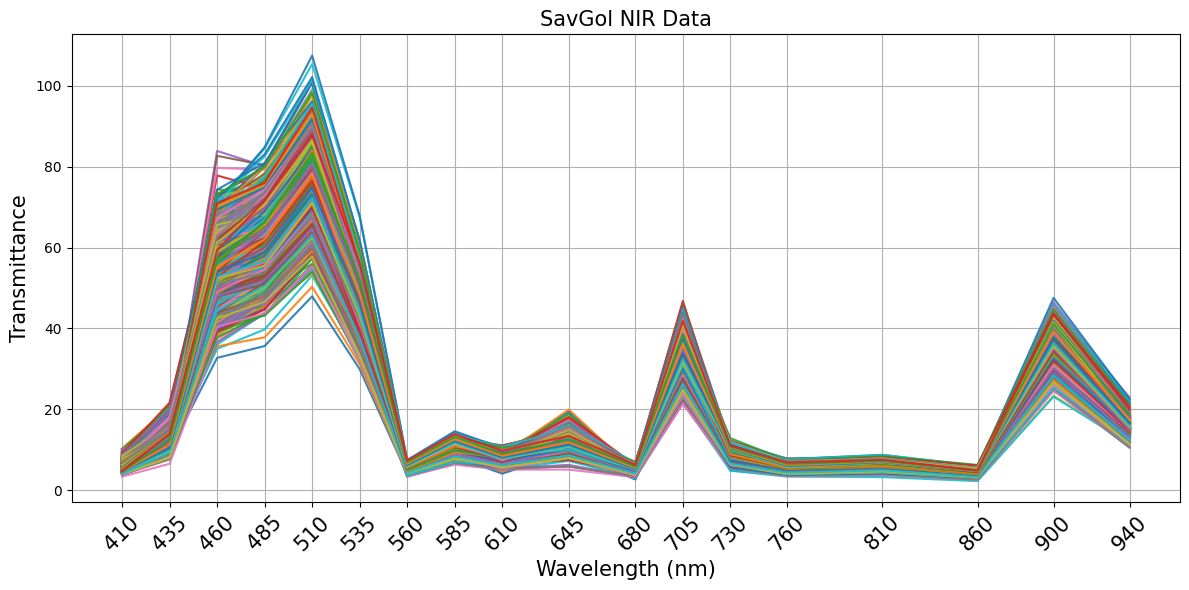

         410nm      435nm      460nm      485nm      510nm      535nm  \
1094  7.323566  12.453147  46.833357  50.480629  65.356154  37.654126   
1147  7.540517  12.969986  49.321888  54.290252  69.849189  40.468196   
164   7.617096  13.292396  50.824382  56.832322  72.812620  42.399725   
1194  7.553301  13.420378  51.340839  58.106839  74.246448  43.448713   
50    7.349133  13.353930  50.871259  58.113804  74.150671  43.615161   
...        ...        ...        ...        ...        ...        ...   
502   4.614587   9.841119  52.839357  56.647413  72.331021  44.092042   
714   4.606937  10.362867  53.832420  58.806154  74.664559  45.907301   
312   4.606793  11.210023  55.245040  62.009814  78.028517  48.524611   
180   4.614154  12.382587  57.077217  66.258392  82.422895  51.943972   
282   4.629021  13.880559  59.328951  71.551888  87.847692  56.165385   

         560nm      585nm     610nm      645nm     680nm      705nm  \
1094  4.390280   9.284685  6.244126  11.196434  3.24

In [ ]:
# @title Apply Savgol filter
from scipy.signal import savgol_filter

# Define parameters
window_length = 11  # Must be an odd integer
polyorder = 2      # Polynomial order
deriv = 0          # Derivative

# Apply Sav-Gol filter to data columns (except the Brix column)
savgol_data = df_clean.iloc[:, :-1].apply(
    lambda x: savgol_filter(x, window_length=window_length, polyorder=polyorder, deriv=deriv), axis=0
)
# Combine smoothed data with the Brix column
savgol_data['Brix'] = df_clean['Brix']

import matplotlib.pyplot as plt

wavelength_columns = ['410nm', '435nm', '460nm', '485nm', '510nm', '535nm',
                      '560nm', '585nm', '610nm', '645nm', '680nm', '705nm',
                      '730nm', '760nm', '810nm', '860nm', '900nm', '940nm']

wavelengths = [int(wl.replace('nm', '')) for wl in wavelength_columns]

# Plot raw spectra
plt.figure(figsize=(12, 6))
for i, row in savgol_data[wavelength_columns].iterrows():
    plt.plot(wavelengths, row.values, alpha=0.9)

plt.xlabel("Wavelength (nm)", fontsize=15)
plt.ylabel("Transmittance", fontsize=15)
plt.title("SavGol NIR Data", fontsize=15)
plt.xticks(wavelengths, rotation=45, fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

x_savgol = savgol_data.drop('Brix', axis = 1)
y_savgol = savgol_data['Brix']

print(x_savgol)
print(y_savgol)

      410nm  435nm  460nm  485nm   510nm  535nm  560nm  585nm  610nm  645nm  \
1094   8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
1147   5.67  10.67  40.67  44.33   53.33  30.67   4.00   8.00   6.33   9.33   
164    8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
1194   8.33  14.00  53.00  58.67   77.33  45.00   5.00  10.67   6.67  12.67   
50     5.67  10.67  40.67  44.33   53.33  30.67   4.00   8.00   6.33   9.33   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
502    4.67   6.67  46.00  43.67   55.00  27.00   4.00   9.00   6.33   8.67   
714    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
312    4.33  12.00  54.33  62.67   79.33  50.33   7.33  14.00   9.00  12.67   
180    5.33  11.67  71.00  84.67  102.67  62.00   5.67  11.33   9.67  10.67   
282    4.33  14.33  51.67  60.00   75.33  51.00   8.00  14.67   9.33  14.67   

      680nm  705nm  730nm  760nm  810nm  860nm  900

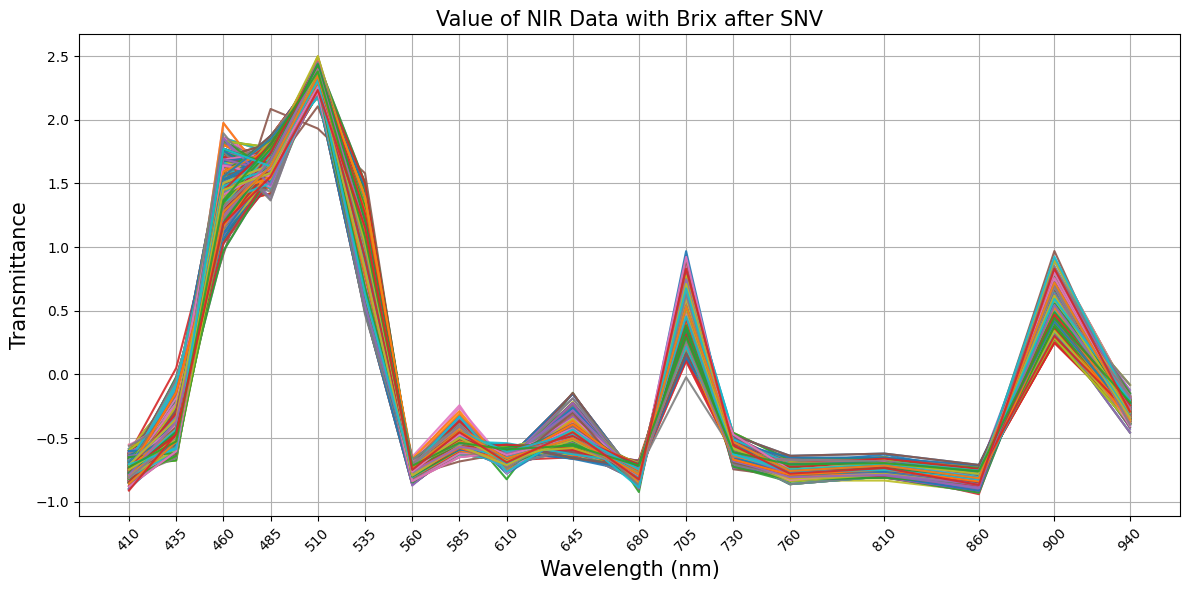

         410nm     435nm     460nm     485nm     510nm     535nm     560nm  \
1094 -0.617848 -0.367032  1.358154  1.608970  2.434405  1.004270 -0.765152   
1147 -0.686965 -0.379797  1.463213  1.688060  2.240963  0.848877 -0.789559   
164  -0.617848 -0.367032  1.358154  1.608970  2.434405  1.004270 -0.765152   
1194 -0.617848 -0.367032  1.358154  1.608970  2.434405  1.004270 -0.765152   
50   -0.686965 -0.379797  1.463213  1.688060  2.240963  0.848877 -0.789559   
...        ...       ...       ...       ...       ...       ...       ...   
502  -0.706307 -0.586340  1.772817  1.633055  2.312669  0.633127 -0.746496   
714  -0.858171 -0.530628  1.277055  1.633211  2.344668  1.106237 -0.730058   
312  -0.858171 -0.530628  1.277055  1.633211  2.344668  1.106237 -0.730058   
180  -0.728333 -0.525968  1.367773  1.804103  2.378641  1.080504 -0.717481   
282  -0.912377 -0.469368  1.184828  1.553854  2.232987  1.155146 -0.749793   

         585nm     610nm     645nm     680nm     705nm     730n

In [ ]:
# @title SNV preprocessing
def snv(data):
    # Center each spectrum by subtracting its mean
    mean_centered_data = data.sub(data.mean(axis=1), axis=0)
    # Scale each spectrum by dividing by its standard deviation
    snv_data = mean_centered_data.div(mean_centered_data.std(axis=1), axis=0)
    return snv_data

# Select only the spectral data columns (except 'Brix' column)
spectral_data = x_clean

print(spectral_data)

# Apply SNV transformation
snv_data = snv(spectral_data)

# Combine SNV transformed data with the Brix column
snv_data['Brix'] = y_clean

# Plot spectra
plt.figure(figsize=(12, 6))
for i, row in snv_data[wavelength_columns].iterrows():
    plt.plot(wavelengths, row.values, alpha=0.9)

plt.xlabel("Wavelength (nm)", fontsize=15)
plt.ylabel("Transmittance", fontsize=15)
plt.title("Value of NIR Data with Brix after SNV", fontsize=15)
plt.xticks(wavelengths, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

x_snv = snv_data.drop('Brix', axis = 1)
y_snv = snv_data['Brix']

print(x_snv)
print(y_snv)

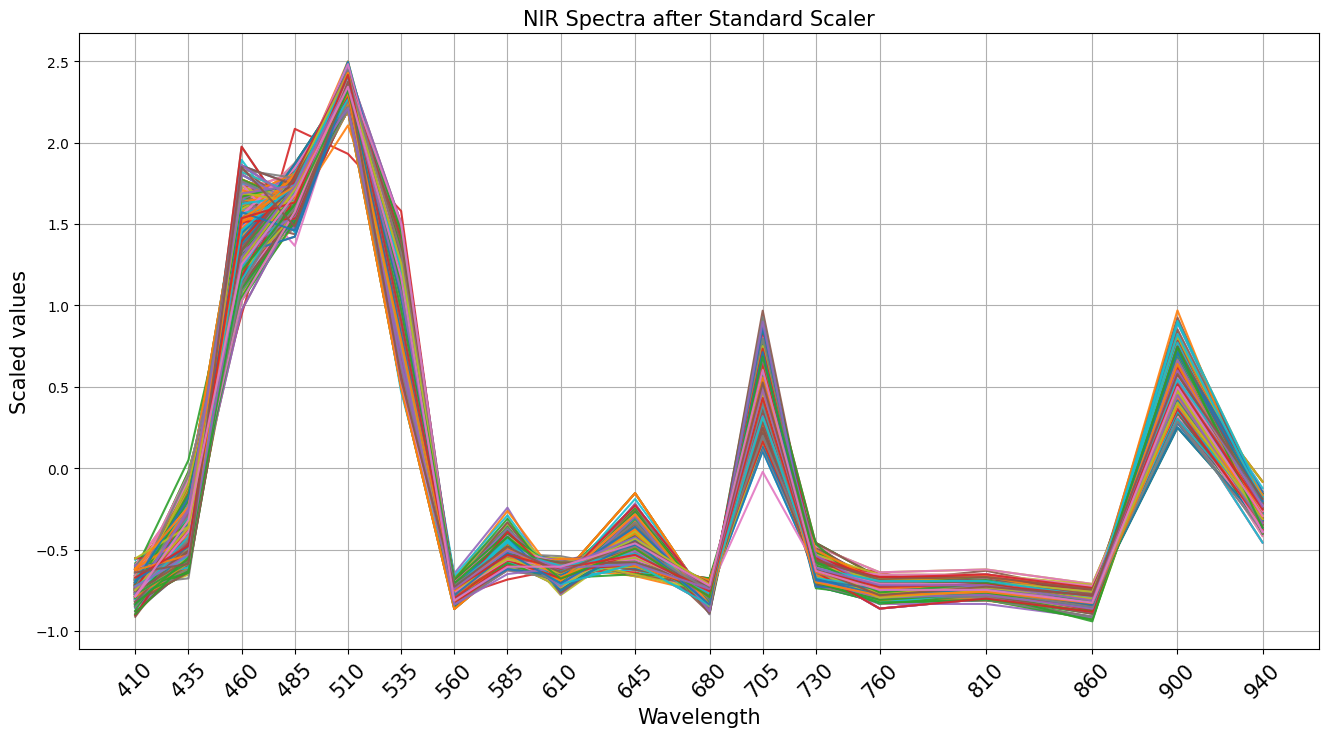

In [ ]:
# @title Split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x_snv, y_snv, test_size=0.2, random_state = 42)

y_test_array = np.array(y_test)
y_train_array = np.array(y_train)

# Scale the data
# scaler = StandardScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)
# # Plot spectra
# plt.figure(figsize=(16, 8))
# for row in x_train_scaled:
#     plt.plot(wavelengths, row, alpha=0.9)

x_train_scaled = x_train
x_test_scaled = x_test
# Plot spectra
plt.figure(figsize=(16, 8))
for index, row in x_train_scaled.iterrows():
    plt.plot(wavelengths, row, alpha=0.9)


plt.xlabel('Wavelength', fontsize=15)
plt.ylabel('Scaled values', fontsize=15)
plt.title('NIR Spectra after Standard Scaler', fontsize=15)
plt.xticks(wavelengths, rotation=45, fontsize=15)
plt.grid(True)
plt.show()

import joblib

# joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
# files.download('scaler.pkl')

In [ ]:
import numpy as np
wavelengths_array = np.array(wavelengths)

target_wavelength = 435

wavelength_idx = np.argmin(np.abs(wavelengths_array - target_wavelength))
actual_wavelength = wavelengths[wavelength_idx] # Get the exact wavelength used

# Extract the standardized values for this specific wavelength from the training set
# All rows, at the column corresponding to the target_wavelength
standardized_values_at_410nm = x_train_scaled[:, wavelength_idx]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(standardized_values_at_410nm, bins=15, color='purple', edgecolor='black', alpha=0.7) # You can adjust 'bins'

plt.xlabel('Standardized Value', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title(f'Distribution of Standardized Values at {actual_wavelength} nm', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid on y-axis for sample count readability

plt.legend()

plt.tight_layout()
plt.show()

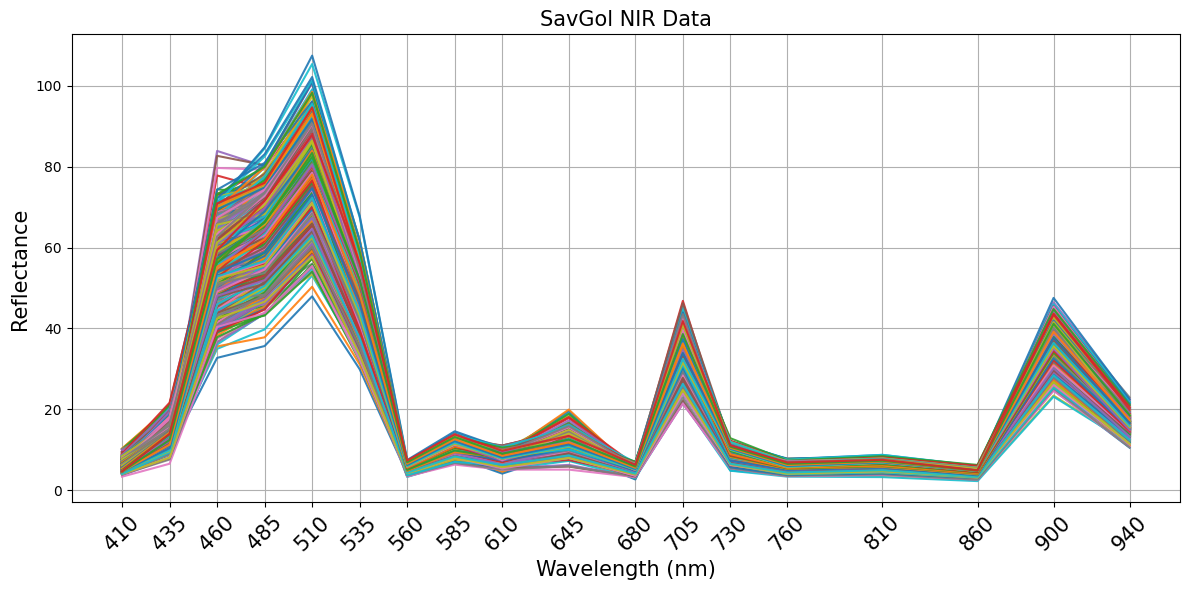

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Create SavgolTransformer class
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd

class SavgolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, window_length=11, polyorder=2, deriv=0):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv

    def fit(self, X, y=None):
        return self  # No fitting needed

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X.apply(lambda x: savgol_filter(x, window_length=self.window_length,
                                                   polyorder=self.polyorder, deriv=self.deriv), axis=0)
        else:
            return savgol_filter(X, window_length=self.window_length,
                                 polyorder=self.polyorder, deriv=self.deriv, axis=1)

# 2. Apply transformer to df_clean (excluding 'Brix')
savgol_transformer = SavgolTransformer(window_length=11, polyorder=2, deriv=0)
x_savgol = savgol_transformer.fit_transform(df_clean.drop('Brix', axis=1))
y_savgol = df_clean['Brix']

# 3. Combine back to visualize or save
savgol_data = pd.DataFrame(x_savgol, columns=df_clean.columns[:-1])
savgol_data['Brix'] = y_savgol

# 4. Plot (optional visualization)
import matplotlib.pyplot as plt

wavelength_columns = ['410nm', '435nm', '460nm', '485nm', '510nm', '535nm',
                      '560nm', '585nm', '610nm', '645nm', '680nm', '705nm',
                      '730nm', '760nm', '810nm', '860nm', '900nm', '940nm']
wavelengths = [int(wl.replace('nm', '')) for wl in wavelength_columns]

plt.figure(figsize=(12, 6))
for i, row in savgol_data[wavelength_columns].iterrows():
    plt.plot(wavelengths, row.values, alpha=0.9)

plt.xlabel("Wavelength (nm)", fontsize=15)
plt.ylabel("Reflectance", fontsize=15)
plt.title("SavGol NIR Data", fontsize=15)
plt.xticks(wavelengths, rotation=45, fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Save SavgolTransformer to .pkl
import joblib
joblib.dump(savgol_transformer, 'savgol_transformer.pkl')

# 6. Download .pkl file from Colab
from google.colab import files
files.download('savgol_transformer.pkl')


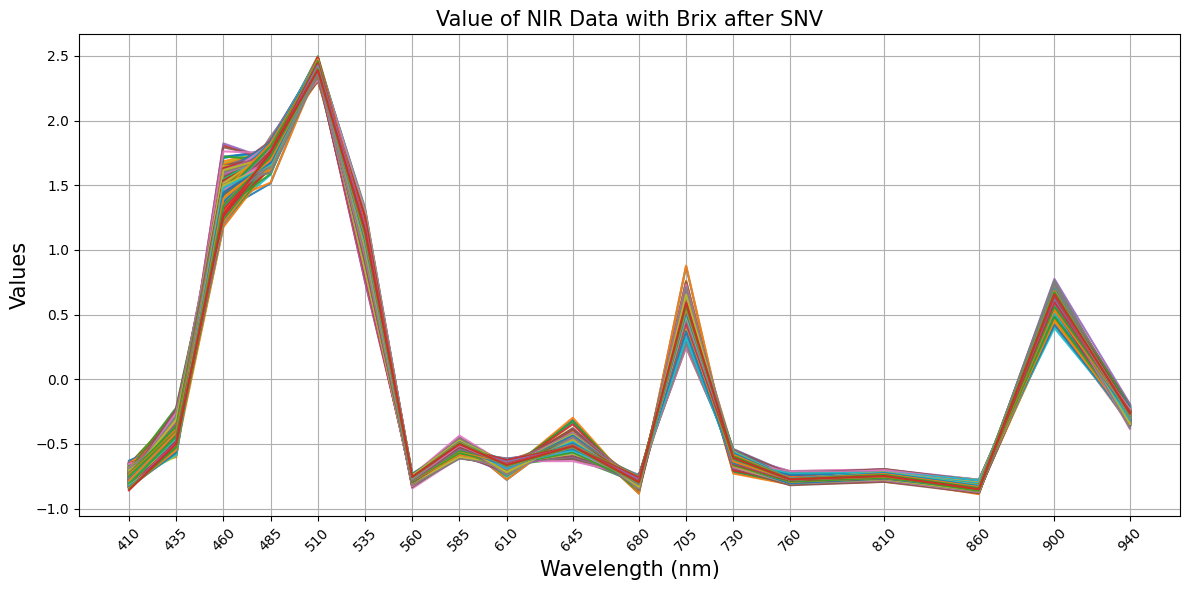

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Wrap SNV in a transformer class
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class SavgolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, window_length=11, polyorder=2, deriv=0):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X)
        return np.apply_along_axis(
            lambda row: savgol_filter(row, self.window_length, self.polyorder, deriv=self.deriv),
            axis=1, arr=X
        )

class SNVTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X)
        mean = np.mean(X, axis=1, keepdims=True)
        std = np.std(X, axis=1, keepdims=True)
        return (X - mean) / (std + 1e-8)  # Avoid division by zero

# 2. Apply SNV to x_savgol
snv_transformer = SNVTransformer()
x_snv = snv_transformer.fit_transform(x_savgol)
y_snv = y_savgol  # Keep Brix values unchanged

# 3. Combine for visualization
snv_data = pd.DataFrame(x_snv, columns=x_savgol.columns)
snv_data['Brix'] = y_snv

# 4. Plot (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, row in snv_data[wavelength_columns].iterrows():
    plt.plot(wavelengths, row.values, alpha=0.9)

plt.xlabel("Wavelength (nm)", fontsize=15)
plt.ylabel("Values", fontsize=15)
plt.title("Value of NIR Data with Brix after SNV", fontsize=15)
plt.xticks(wavelengths, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Save SNV transformer to .pkl
import joblib
joblib.dump(snv_transformer, 'snv_transformer.pkl')

# 6. Download the .pkl file (Colab)
from google.colab import files
files.download('snv_transformer.pkl')


## Random Forest

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

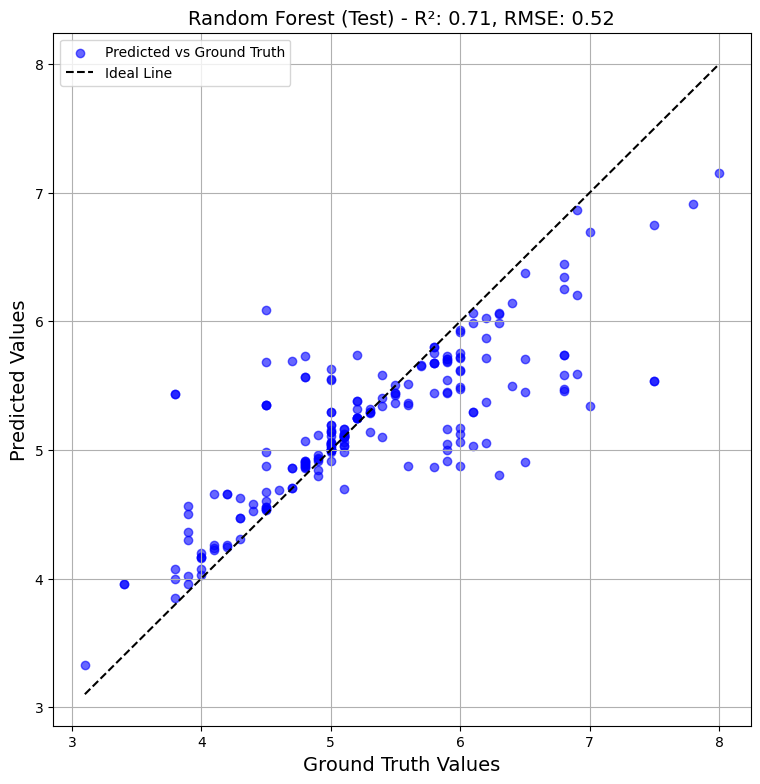

In [ ]:
!pip install scikit-optimize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(1, 400),
    'min_samples_split': Integer(2, 400),
    'min_samples_leaf': Integer(1, 400),
    'max_features': Categorical(['sqrt', 'log2'])
}

opt = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


opt.fit(x_train_scaled, y_train_array)


train_preds_rf = opt.predict(x_train_scaled)
test_preds_rf = opt.predict(x_test_scaled)

# --- Evaluate ---
train_r2_rf = r2_score(y_train_array, train_preds_rf)
test_r2_rf = r2_score(y_test_array, test_preds_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train_array, train_preds_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test_array, test_preds_rf))

# --- Print Results ---
print(f"Best Parameters: {opt.best_params_}")
print(f"Train R²: {train_r2_rf:.4f}, RMSE: {train_rmse_rf:.4f}")
print(f"Test R²: {test_r2_rf:.4f}, RMSE: {test_rmse_rf:.4f}")

# --- Plot ---
plt.figure(figsize=(9, 9))
plt.scatter(y_test_array, test_preds_rf, color='blue', alpha=0.6, label='Predicted vs Ground Truth')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='black', linestyle='--', label='Ideal Line')
plt.xlabel('Ground Truth Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)
plt.title('Random Forest (Test) - R²: 0.71, RMSE: 0.52', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

RF Train R²: 0.95, Train RMSE: 0.1939
RF Test R²: 0.68, Test RMSE: 0.5170


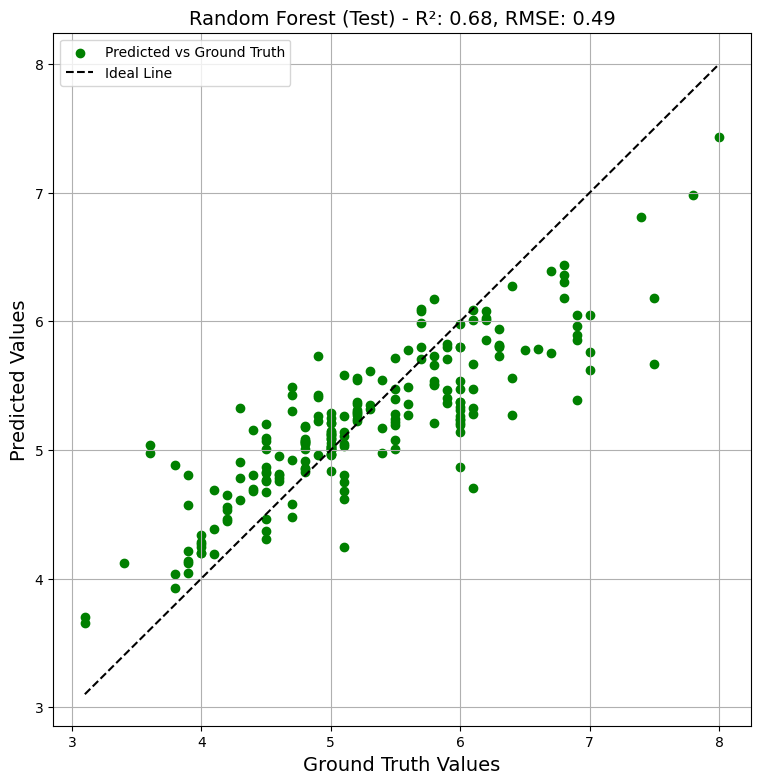

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(max_depth= 312, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 429)
rf_model.fit(x_train_scaled, y_train_array)

# print(x_train_scaled)
# print(y_train)

# Make predictions
train_predictions = rf_model.predict(x_train_scaled)
test_predictions = rf_model.predict(x_test_scaled)

# Calculate R² and RMSE
train_r2_rf = r2_score(y_train_array, train_predictions)
train_rmse_rf = np.sqrt(mean_squared_error(y_train_array, train_predictions))
test_r2_rf = r2_score(y_test_array, test_predictions)
test_rmse_rf = np.sqrt(mean_squared_error(y_test_array, test_predictions))

print(f"RF Train R²: {train_r2_rf:.2f}, Train RMSE: {train_rmse_rf:.4f}")
print(f"RF Test R²: {test_r2_rf:.2f}, Test RMSE: {test_rmse_rf:.4f}")

# Scatter plot: True vs. Predicted values
plt.figure(figsize=(9, 9))
plt.scatter(y_test_array, test_predictions, color='green', label='Predicted vs Ground Truth')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='black', linestyle='--', label='Ideal Line')
plt.xlabel('Ground Truth Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)
plt.title('Random Forest (Test) - R²: 0.68, RMSE: 0.49', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

In [ ]:
from google.colab import files
files.download('rf_model.pkl')

[5.9 3.6 4.8 4.5 5.6 5.5 6.7 4.4 4.8 4.8 6.7 7.4 5.  5.  5.4 4.5 4.  6.3
 3.1 6.4 5.5 3.6 5.1 6.  4.7 5.2 6.  5.2 4.1 6.8 5.5 4.8 7.5 6.8 4.8 7.8
 6.  4.2 4.8 6.  7.  5.8 5.  4.  6.  5.1 5.  4.6 5.8 6.  4.2 3.8 4.8 5.5
 6.9 5.7 6.  7.  6.  4.5 4.9 3.9 5.5 6.9 6.1 4.8 3.9 5.3 4.1 5.1 6.6 5.
 5.6 4.4 5.8 5.2 4.5 4.5 4.3 5.  4.7 4.3 6.  5.7 6.8 5.5 5.1 4.7 4.  5.2
 5.  6.2 5.6 5.9 5.8 4.5 4.5 4.6 5.2 3.8 6.3 3.9 5.1 5.8 5.  5.  5.9 5.
 6.4 7.5 4.7 4.6 5.  4.9 6.4 5.1 5.2 5.  4.9 5.9 5.5 5.3 8.  4.  7.  5.2
 4.5 3.9 5.2 6.1 4.2 6.1 6.  5.1 5.3 4.5 5.  5.  6.  6.  4.3 4.6 5.  6.3
 6.2 5.  5.  5.  5.6 5.4 3.9 4.8 5.1 6.  4.  6.8 3.4 4.7 4.8 5.  5.4 6.2
 4.2 6.2 4.5 4.7 4.5 4.8 4.9 5.1 4.8 5.  6.3 6.9 5.7 5.5 5.8 4.9 6.  5.1
 3.1 3.9 4.3 4.9 5.7 6.  4.6 5.7 6.5 4.4 5.8 5.  5.2 6.1 4.8 5.  5.5 6.3
 5.2 5.  6.1 5.9 6.9 6.9 4.5 6.1 5.  6.  4.5 4.2 5.1 4.1 5.9 3.8 4.  4.4
 6.1]
[5.59840321 5.04237311 4.99663474 5.164915   5.67494495 5.73460573
 5.69183232 4.6567562  5.05635133 1.69678444 5.657615

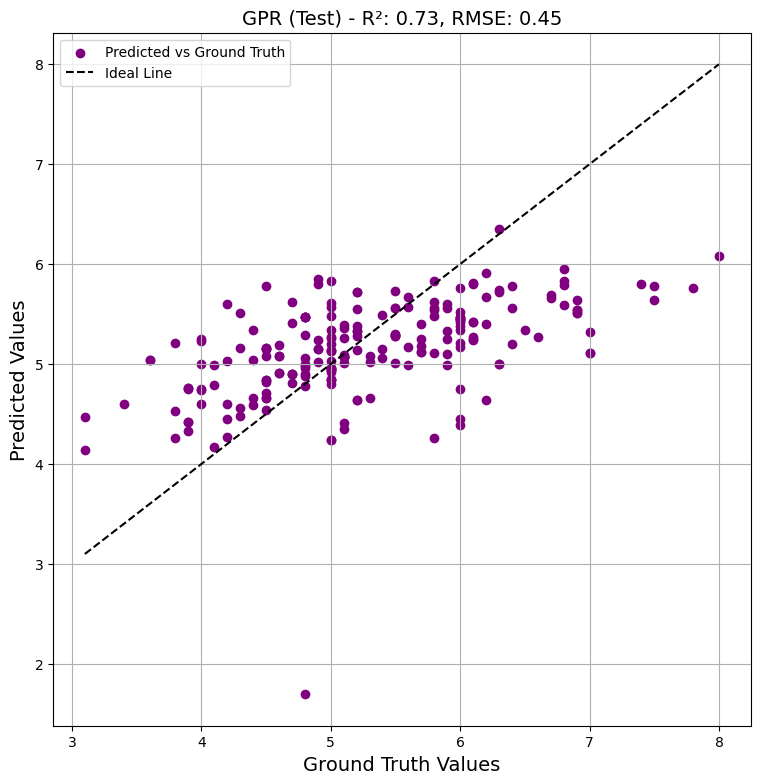

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C, Matern
from sklearn.metrics import r2_score, mean_squared_error

# kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
length_scale= 0.8709
noise_level= 0.143928
constant_value= 10.000

# kernel = C(constant_value, constant_value_bounds="fixed") * \
#              Matern(length_scale, nu=1.5) + \
#              WhiteKernel(noise_level)

kernel = C(1.0, constant_value_bounds="fixed") * RBF(length_scale=0.9648, length_scale_bounds=(1e-2, 1e2)) \
         + WhiteKernel(noise_level=0.759353, noise_level_bounds=(1e-5, 1e1))

gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr_model.fit(x_train_scaled, y_train_array)

train_preds = gpr_model.predict(x_train_scaled)
test_preds = gpr_model.predict(x_test_scaled)

print(y_test_array)
print(test_preds)

from sklearn.metrics import r2_score, mean_squared_error
train_r2_gpr = r2_score(y_train_array, train_preds)
train_rmse_gpr = np.sqrt(mean_squared_error(y_train_array, train_preds))
test_r2_gpr = r2_score(y_test_array, test_preds)
test_rmse_gpr = np.sqrt(mean_squared_error(y_test_array, test_preds))

print(f"GPR - Train R²: {train_r2_gpr:.4f}, Train RMSE: {train_rmse_gpr:.4f}")
print(f"GPR - Test R²: {test_r2_gpr:.4f}, Test RMSE: {test_rmse_gpr:.4f}")

plt.figure(figsize=(9, 9))
plt.scatter(y_test_array, test_preds, color='purple', label='Predicted vs Ground Truth')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='black', linestyle='--', label='Ideal Line')
plt.xlabel('Ground Truth Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)
plt.title('GPR (Test) - R²: 0.73, RMSE: 0.45', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(gpr_model, 'gpr_model.pkl')

from google.colab import files
files.download('gpr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

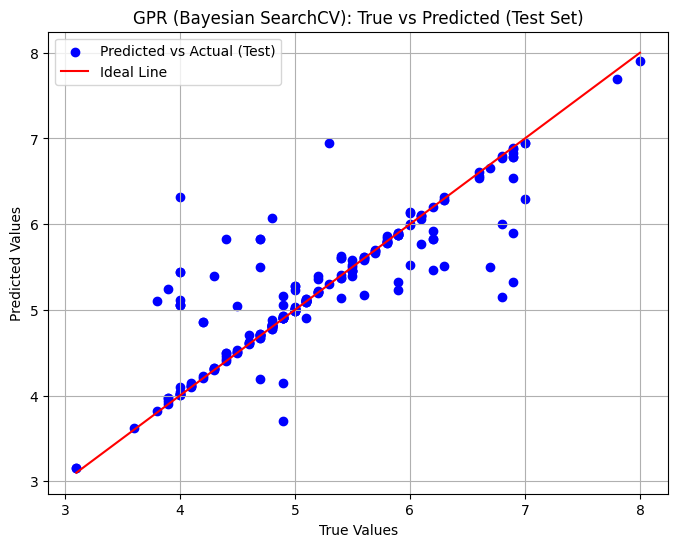

In [ ]:
!pip install scikit-optimize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real

# Define a function to create kernel given 3 parameters
def make_kernel(length_scale, noise_level, constant_value):
    return C(constant_value, constant_value_bounds="fixed") * \
           Matern(length_scale=length_scale, nu=1.5) + \
           WhiteKernel(noise_level=noise_level)

# Use a base kernel (placeholders)
base_kernel = make_kernel(1.0, 1e-3, 1.0)

# Initialize base model
gpr = GaussianProcessRegressor(kernel=base_kernel, normalize_y=True, random_state=42)

# Define hyperparameter search space
param_space = {
    'kernel__k1__k1__constant_value': Real(0.1, 10.0, prior='log-uniform'),   # ConstantKernel value
    'kernel__k1__k2__length_scale': Real(1e-2, 10.0, prior='log-uniform'),    # Matern length_scale
    'kernel__k2__noise_level': Real(1e-5, 1.0, prior='log-uniform')           # WhiteKernel noise
}

# Setup Bayesian Search
opt = BayesSearchCV(
    estimator=gpr,
    search_spaces=param_space,
    n_iter=50,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Run search
opt.fit(x_train_scaled, y_train_array)

# Best model and predictions
best_model = opt.best_estimator_
y_pred_train_gpr = best_model.predict(x_train_scaled)
y_pred_test_gpr = best_model.predict(x_test_scaled)

# Evaluate performance
train_r2_gpr = r2_score(y_train_array, y_pred_train_gpr)
train_rmse_gpr = np.sqrt(mean_squared_error(y_train_array, y_pred_train_gpr))
test_r2_gpr = r2_score(y_test_array, y_pred_test_gpr)
test_rmse_gpr = np.sqrt(mean_squared_error(y_test_array, y_pred_test_gpr))

# Print results
print(f"Best Parameters: {opt.best_params_}")
print(f"GPR - Train R²: {train_r2_gpr:.4f}, Train RMSE: {train_rmse_gpr:.4f}")
print(f"GPR - Test R²: {test_r2_gpr:.4f}, Test RMSE: {test_rmse_gpr:.4f}")

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y_test_array, y_pred_test_gpr, color='blue', label='Predicted vs Actual (Test)')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('GPR (Bayesian SearchCV): True vs Predicted (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


[5.92905468 5.21971159 4.44682092 4.48964385 5.65764832 5.49800908
 6.28176721 4.58088203 5.0623381  5.13114161 6.32356583 6.85578502
 5.14854116 5.32207266 5.65118568 4.82803144 4.79618782 5.76073021
 3.36079492 5.95756351 5.30285823 5.21726746 4.96275291 5.66809
 4.60084497 5.36485943 5.39259931 5.13064057 4.37802534 6.48953054
 5.21565066 5.19693446 6.46831506 6.40476068 5.37651807 5.83009486
 5.09211317 4.71659338 5.03653895 5.26542128 5.96773111 6.09587608
 5.18328929 4.19596522 5.42006299 5.19727308 5.00524002 4.84295597
 6.05116229 5.40621985 4.62207387 5.21094483 4.97661877 5.24390422
 6.09581115 5.60719228 5.58762361 6.50178864 5.57540954 4.94703817
 5.06412426 4.17914432 5.50527215 6.01004418 5.14199361 4.75762298
 4.15496385 5.35908435 4.29505506 5.11222002 6.18972861 5.20669569
 5.25032104 4.90981614 5.32462456 5.35975799 4.72429824 4.75551675
 4.45519573 4.84366364 5.41492679 4.72836832 4.87627585 6.02539783
 6.56917597 5.23302927 4.97633669 5.11023287 4.71431404 5.4367336

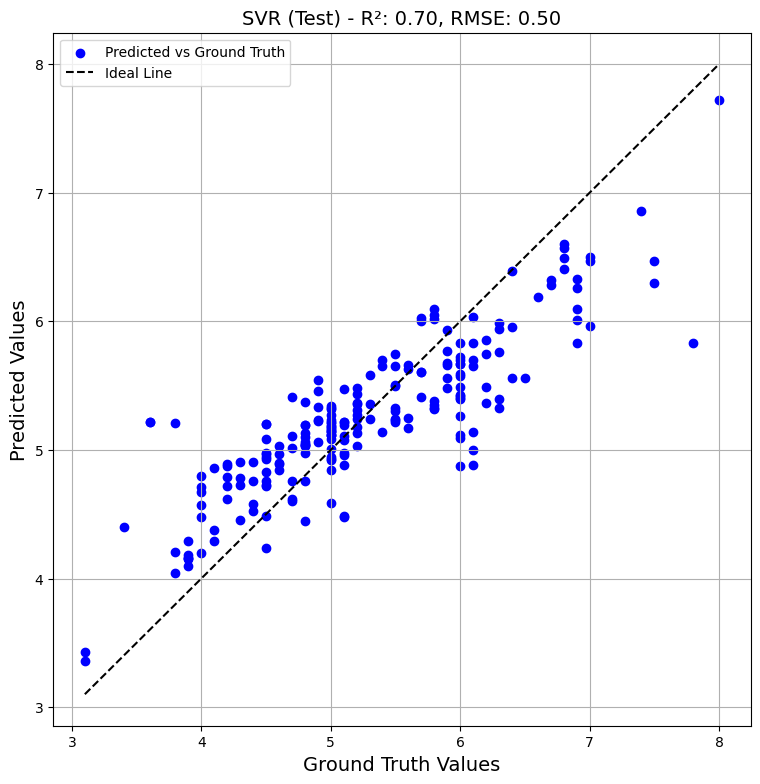

In [ ]:
# @title SVR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

svr_model = SVR(kernel='rbf', C=100, epsilon=0.2, gamma=0.3)

svr_model.fit(x_train_scaled, y_train_array)

y_pred_train = svr_model.predict(x_train_scaled)
y_pred_test = svr_model.predict(x_test_scaled)

print(y_pred_test)

train_r2_svr = r2_score(y_train_array, y_pred_train)
test_r2_svr = r2_score(y_test_array, y_pred_test)
train_rmse_svr = np.sqrt(mean_squared_error(y_train_array, y_pred_train))
test_rmse_svr = np.sqrt(mean_squared_error(y_test_array, y_pred_test))

print(f"SVR - Train R²: {train_r2_svr:.4f}, Train RMSE: {train_rmse_svr:.4f}")
print(f"SVR - Test R²: {test_r2_svr:.4f}, Test RMSE: {test_rmse_svr:.4f}")

plt.figure(figsize=(9, 9))
plt.scatter(y_test_array, y_pred_test, color='blue', label='Predicted vs Ground Truth')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='black', linestyle='--', label='Ideal Line')
plt.xlabel('Ground Truth Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)
plt.title('SVR (Test) - R²: 0.70, RMSE: 0.50', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

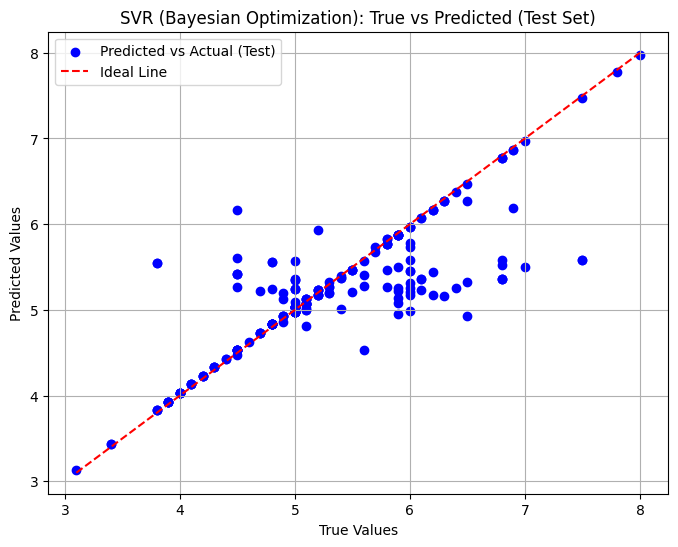

In [ ]:
!pip install scikit-optimize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real

# Define the search space
param_space = {
    'C': Real(1e-2, 1e3, prior='log-uniform'),
    'epsilon': Real(1e-3, 1.0, prior='log-uniform'),
    'gamma': Real(1e-4, 1.0, prior='log-uniform')
}

# Define the model
svr = SVR(kernel='rbf')

# Initialize BayesSearchCV
opt = BayesSearchCV(
    estimator=svr,
    search_spaces=param_space,
    n_iter=50,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
opt.fit(x_train_scaled, y_train_array)

# Predict
y_pred_train = opt.predict(x_train_scaled)
y_pred_test = opt.predict(x_test_scaled)

# Evaluate
train_r2_svr = r2_score(y_train_array, y_pred_train)
test_r2_svr = r2_score(y_test_array, y_pred_test)
train_rmse_svr = np.sqrt(mean_squared_error(y_train_array, y_pred_train))
test_rmse_svr = np.sqrt(mean_squared_error(y_test_array, y_pred_test))

# Output results
print(f"Best Parameters: {opt.best_params_}")
print(f"SVR - Train R²: {train_r2_svr:.4f}, Train RMSE: {train_rmse_svr:.4f}")
print(f"SVR - Test R²: {test_r2_svr:.4f}, Test RMSE: {test_rmse_svr:.4f}")

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y_test_array, y_pred_test, color='blue', label='Predicted vs Actual (Test)')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR (Bayesian Optimization): True vs Predicted (Test Set)')
plt.legend()
plt.grid(True)
plt.show()
